In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel('wenke1ben.xls')

In [3]:
df

,year,hubei,henan,shanxi,jiangxi,hunan,anhui
0,2020,531,556,542,547,550,541
1,2019,542,536,545,558,553,550
2,2018,561,547,546,568,569,550
3,2017,528,516,518,533,548,515
4,2016,520,517,518,523,530,521
5,2015,521,513,513,528,535,597
6,2014,535,536,526,524,562,541
7,2013,531,519,507,532,557,540
8,2012,561,557,539,570,571,577
9,2011,547,562,543,532,583,547


# 相关性图

C:\Users\dyw2000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


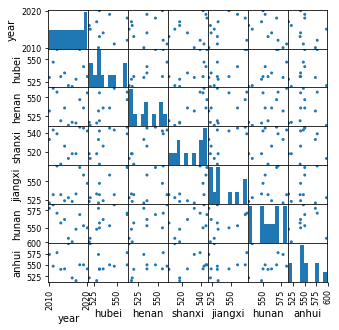

In [4]:
# 整体相关关系及频率图
fig, ax = plt.subplots(figsize=(5,5))
scatter_matrix(df, alpha=1, ax=ax)
plt.show()

# 热力图

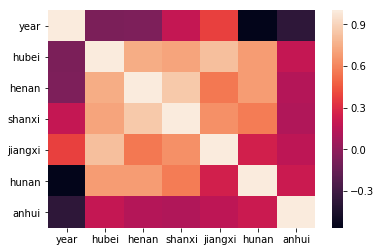

In [5]:
# 相关矩阵热力图
sns.heatmap(df.corr(), annot=False)

# 散点图

In [6]:
x = df.values[:, 1] 
y = df.values[:, 2] 
z = df.values[:, 3] 

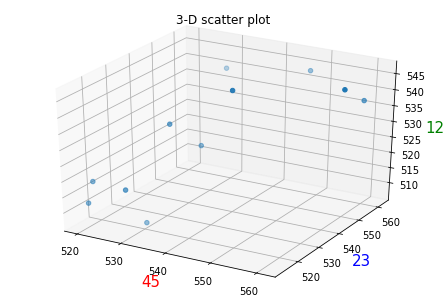

In [7]:
# 绘制空间散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
ax.set_zlabel('12', fontdict={'size': 15, 'color': 'green'})
ax.set_ylabel('23', fontdict={'size': 15, 'color': 'blue'})
ax.set_xlabel('45', fontdict={'size': 15, 'color': 'red'})
plt.title('3-D scatter plot')
plt.show()

C:\Users\dyw2000\Anaconda3\lib\site-packages\matplotlib\markers.py:373: MatplotlibDeprecationWarning: 
Setting a circle marker using `(..., 3)` is deprecated since Matplotlib 3.0, and support for it will be removed in 3.2.  Directly pass 'o' instead.
  "3.0", "Setting a circle marker using `(..., 3)` is "


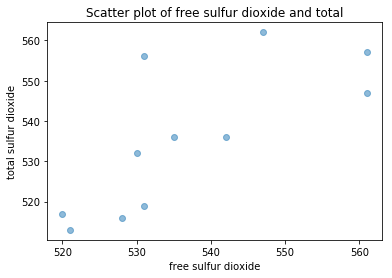

In [8]:
# 散点图
plt.scatter(x, y, alpha=0.5, marker=(9, 3, 30))
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.title('Scatter plot of free sulfur dioxide and total')
plt.show()

# 雷达图

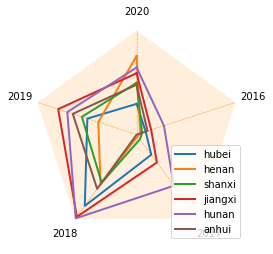

In [9]:
data = pd.DataFrame(pd.read_excel("wenke1radar.xls"))

def plot_radar(data):

    kinds = data.iloc[:, 0]
    labels = data.iloc[:, 1:].columns
    centers = pd.concat([data.iloc[:, 1:], data.iloc[:, 1]], axis=1)
    centers = np.array(centers)
    n = len(labels)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)  # 设置坐标为极坐标
    # 画若干个多边形
    floor = np.floor(centers.min())  # 大于最小值的最大整数
    ceil = np.ceil(centers.max())  # 小于最大值的最小整数
    for i in np.arange(floor, ceil + 0.5, 0.5):
        ax.plot(angles, [i] * (n + 1), '-', lw=0.5, color='bisque')
    # 画不同人的分割线
    for i in range(n):
        ax.plot([angles[i], angles[i]], [floor, ceil], '--', lw=0.5, color='darkorange')
    # 画不同的人所占的大小
    for i in range(len(kinds)):
        ax.plot(angles, centers[i], lw=2, label=kinds[i])
        # ax.fill(angles, centers[i])
    ax.set_thetagrids(angles * 180 / np.pi, labels)  # 设置显示的角度，将弧度转换为角度
    plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))  # 设置图例的位置
    ax.set_theta_zero_location('N')  # 设置极坐标的起点（即0°）在正北方向，即相当于坐标轴逆时针旋转90°
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    ax.grid(False)  # 不显示默认的分割线
    ax.set_yticks([])  # 不显示坐标间隔
    plt.show()

plot_radar(data)